<a href="https://colab.research.google.com/github/agusttinjp/Proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
            "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología"]

# Función para generar un nombre y apellido aleatorios
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Carla", "José", "Laura", "Diego", "Sofia"]
  apellidos = ["Gómez", "Pérez", "Rodríguez", "García", "Fernández", "López", "Martínez", "Sánchez", "Romero", "Díaz"]
  return random.choice(nombres), random.choice(apellidos)

# Generar datos para el DataFrame
datos = []
for i in range(100):
  nombre, apellido = generar_nombre_apellido()
  dni = random.randint(10000000, 99999999)  # DNI aleatorio
  for _ in range(random.randint(3, 5)):  # Cada alumno cursa entre 3 y 5 materias
    materia = random.choice(materias)
    nota_1er_trimestre = round(random.uniform(4, 10), 1)
    nota_2do_trimestre = round(random.uniform(4, 10), 1)
    nota_3er_trimestre = round(random.uniform(4, 10), 1)
    faltas = random.randint(0, 15)
    datos.append([nombre, apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Nombre", "Apellido", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Nombre,Apellido,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,María,Sánchez,59729887,Física,4.5,8.7,7.7,15
1,María,Sánchez,59729887,Filosofía,8.9,9.7,8.2,4
2,María,Sánchez,59729887,Historia,7.5,6.6,7.0,13
3,María,Sánchez,59729887,Física,9.3,6.7,7.4,14
4,María,Sánchez,59729887,Lengua y Literatura,8.5,4.7,4.7,14
...,...,...,...,...,...,...,...,...
415,José,Rodríguez,13200942,Geografía,4.5,9.3,6.8,14
416,José,Rodríguez,13200942,Física,6.7,9.4,7.4,7
417,José,Rodríguez,13200942,Filosofía,7.2,9.5,5.7,0
418,José,Rodríguez,13200942,Geografía,5.4,5.3,8.0,11


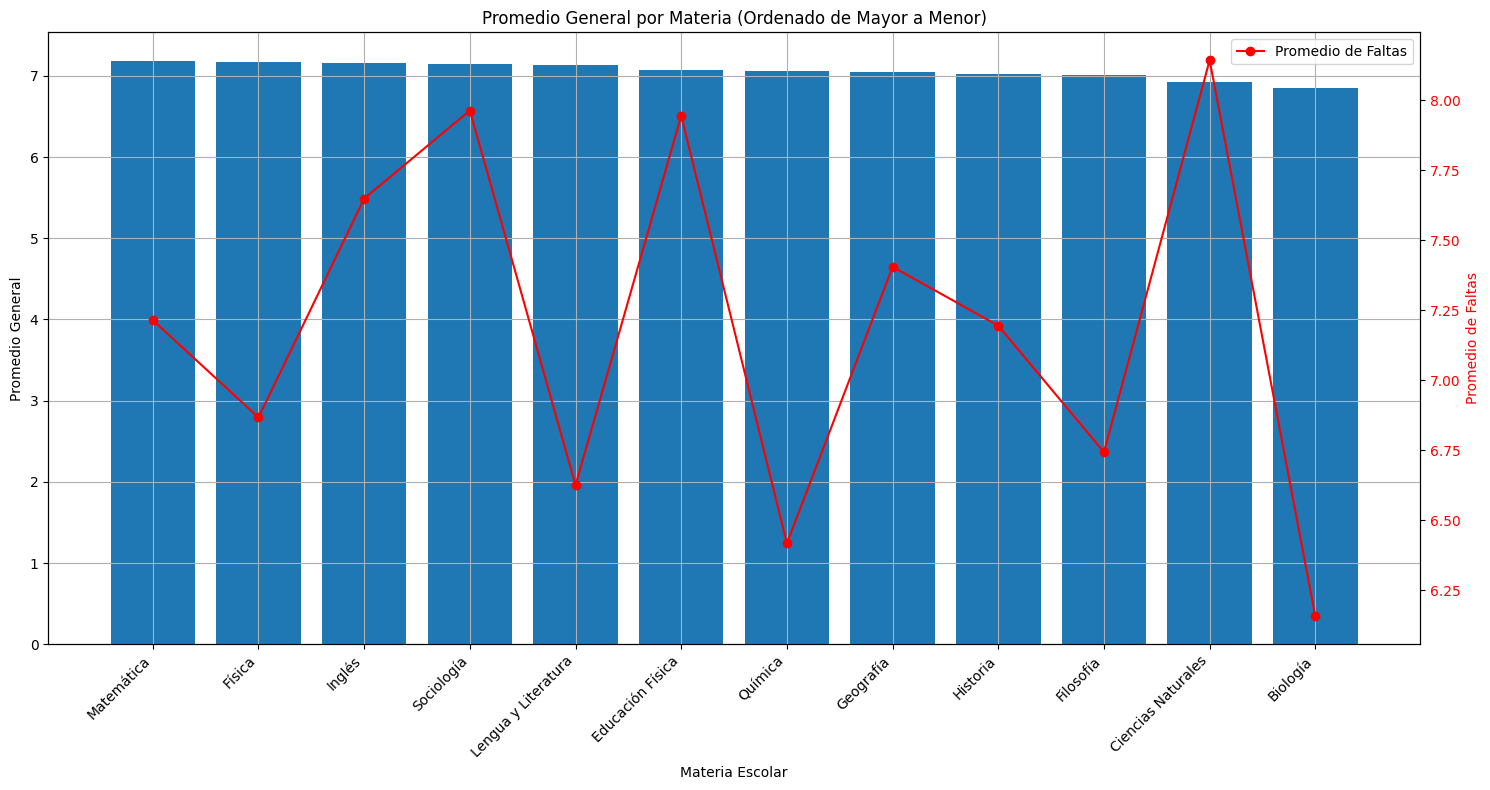

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a clases': 'mean'})
promedio_por_materia['Promedio General'] = (promedio_por_materia['Nota 1er Trimestre'] + promedio_por_materia['Nota 2do Trimestre'] + promedio_por_materia['Nota 3er Trimestre']) / 3

# Ordenar las materias por promedio general de mayor a menor
promedio_por_materia = promedio_por_materia.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
plt.bar(promedio_por_materia.index, promedio_por_materia['Promedio General'])
plt.xlabel('Materia Escolar')
plt.ylabel('Promedio General')
plt.title('Promedio General por Materia (Ordenado de Mayor a Menor)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)


# Agregar las faltas como valor constrastable en un segundo eje
ax2 = plt.twinx()
ax2.plot(promedio_por_materia.index, promedio_por_materia['Faltas a clases'], color='red', marker='o')
ax2.set_ylabel('Promedio de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
plt.legend(['Promedio de Faltas'], loc='upper right')

plt.tight_layout()
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)